In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
def plotfunc(df_static, df_treedict, df_treegrowth, static_points, treedict_points, treegrowth_points, xlim, area):
    dim = 1/30
    bins = np.linspace(0-dim, 1+dim, 16)
    print(bins)
    fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10,3))
    
    axs[1].hist([df_treedict['count'], treedict_points], bins=bins, stacked=True, color=['black', 'blue'])
    axs[1].set_title('tree dictionary')
    axs[1].set_xlabel('intersection score', fontsize=14)

    axs[0].hist([df_static['count'], static_points], bins=bins, stacked=True, color=['black', 'blue'])
    axs[0].set_ylabel('frequency', fontsize=14)
    axs[0].set_title('static')
    axs[0].set_xlabel('intersection score', fontsize=14)
    
    axs[2].hist([df_treegrowth['count'], treegrowth_points], bins=bins, stacked=True, color=['black', 'blue'])
    axs[2].set_title('tree growth')
    axs[2].set_xlabel('intersection score', fontsize=14)

    plt.xlim(xlim[0], xlim[1])
    
    legend_elements = [Patch(facecolor='black', edgecolor='black', label='shapefiles'),
                    Patch(facecolor='blue', edgecolor='blue', label='points')
                    ]
    axs[0].legend(handles=legend_elements, loc='upper left')

    plt.tight_layout()
#     fig.autofmt_xdate()
    plt.savefig('plots/hists_normalized_{}'.format(area), dpi=300)
    plt.show()

In [3]:
# def plotfunc(df_static, df_treedict, df_treegrowth, static_points, treedict_points, treegrowth_points, xlim):
#     dim = 1/30
#     bins = np.linspace(0-dim, 1+dim, 16)
#     print(bins)
#     fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,10))

#     axs[0,0].axis('off')
    
#     axs[1, 0].hist([df_treedict['count'], treedict_points], bins=bins, stacked=True, color=['black', 'blue'])
#     axs[1, 0].set_title('tree dictionary')
#     axs[1, 0].set_ylabel('frequency', fontsize=14)
#     axs[1, 0].set_xlabel('intersection score', fontsize=14)

#     axs[0, 1].hist([df_static['count'], static_points], bins=bins, stacked=True, color=['black', 'blue'])
#     axs[0, 1].set_ylabel('frequency', fontsize=14)
#     axs[0, 1].set_title('static')

#     axs[1, 1].hist([df_treegrowth['count'], treegrowth_points], bins=bins, stacked=True, color=['black', 'blue'])
#     axs[1, 1].set_title('tree growth')
#     axs[1, 1].set_xlabel('intersection score', fontsize=14)

#     plt.xlim(xlim[0], xlim[1])
    
#     legend_elements = [Patch(facecolor='black', edgecolor='black', label='shapefile inspection'),
#                     Patch(facecolor='blue', edgecolor='blue', label='point inspection')
#                     ]
#     axs[0,0].legend(handles=legend_elements, loc='center')

# #     plt.tight_layout()
# #     fig.autofmt_xdate()
#     plt.show()

# Wallengebied

In [4]:
# retrieve static method shapefile results and merge on id
df_wallen_static = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\wallengebied_2020_static.csv")
df_wallen_static_pol = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\wallen_static_polygonen.csv")
display(df_wallen_static_pol)
id_wallen_static_pol = []
for i, row in df_wallen_static_pol.iterrows():
    number = row['uid'][3:9]
    id_wallen_static_pol.append(int(number))
df_wallen_static_pol_2 = df_wallen_static[df_wallen_static['number'].isin(id_wallen_static_pol)]

,uid,type,parents,children,attribute.function
0,id-339738_marginal,SolitaryVegetationObject,NaN,NaN,something
1,id-348099_marginal,SolitaryVegetationObject,NaN,NaN,something
2,id-339736_marginal,SolitaryVegetationObject,NaN,NaN,something
3,id-348098_marginal,SolitaryVegetationObject,NaN,NaN,something
4,id-339969_marginal,SolitaryVegetationObject,NaN,NaN,something
...,...,...,...,...,...
195,id-347649_marginal,SolitaryVegetationObject,NaN,NaN,something
196,id-340202_marginal,SolitaryVegetationObject,NaN,NaN,something
197,id-340200_marginal,SolitaryVegetationObject,NaN,NaN,something
198,id-347172_marginal,SolitaryVegetationObject,NaN,NaN,something


1.000000    370
0.733333     87
0.666667     77
0.800000     51
0.866667     42
0.600000     21
0.933333     16
0.466667     10
0.533333     10
0.400000      3
0.133333      2
0.266667      1
0.066667      1
0.333333      1
Name: count, dtype: int64
1.000000    124
0.866667     22
0.800000     15
0.733333     13
0.666667     11
0.933333      8
0.600000      4
0.466667      2
0.533333      1
Name: count, dtype: int64
0.066667         NaN
0.133333         NaN
0.266667         NaN
0.333333         NaN
0.400000         NaN
0.466667    0.200000
0.533333    0.100000
0.600000    0.190476
0.666667    0.142857
0.733333    0.149425
0.800000    0.294118
0.866667    0.523810
0.933333    0.500000
1.000000    0.335135
Name: count, dtype: float64
Float64Index([0.0666666666666666, 0.1333333333333333, 0.2666666666666666,
              0.3333333333333333,                0.4, 0.4666666666666667,
              0.5333333333333333,                0.6, 0.6666666666666666,
              0.7333333333333333,   

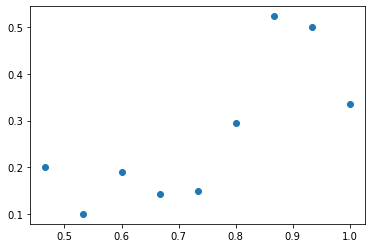

In [53]:
occurence_wallen_static = df_wallen_static['count'].value_counts()
occurence_shapefiles = df_wallen_static_pol_2['count'].value_counts()
print(occurence_wallen_static)
print(occurence_shapefiles)
print(occurence_shapefiles/ occurence_wallen_static)


normalize = occurence_shapefiles/ occurence_wallen_static
print(normalize.keys())
plt.scatter(normalize.keys(), normalize)


In [6]:
# retrieve treedict method shapefile results and merge on id
df_wallen_treedict = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\wallengebied_2020_treedict.csv")
df_wallen_treedict_pol = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\wallen_treedict_polygonen.csv")
id_wallen_treedict_pol = []
for i, row in df_wallen_treedict_pol.iterrows():
    number = row['uid'][3:9]
    id_wallen_treedict_pol.append(int(number))
df_wallen_treedict_pol_2 = df_wallen_treedict[df_wallen_treedict['number'].isin(id_wallen_treedict_pol)]

In [7]:
# retrieve treegrowth method shapefile results and merge on id
df_wallen_treegrowth = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\wallengebied_2020_treegrowth.csv")
df_wallen_treegrowth_pol = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\wallen_treegrowth_polygonen.csv")
id_wallen_treegrowth_pol = []
for i, row in df_wallen_treegrowth_pol.iterrows():
    number = row['uid'][3:9]
    id_wallen_treegrowth_pol.append(int(number))
df_wallen_treegrowth_pol_2 = df_wallen_treegrowth[df_wallen_treegrowth['number'].isin(id_wallen_treegrowth_pol)]

In [8]:
# retrieve results from point intersection
wallen_static_points = np.load(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\wallen_static_punten.npy")
wallen_treedict_points = np.load(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\wallen_treedict_punten.npy")
wallen_treegrowth_points = np.load(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\wallen_treegrowth_punten.npy")

[-0.03333333  0.03777778  0.10888889  0.18        0.25111111  0.32222222
  0.39333333  0.46444444  0.53555556  0.60666667  0.67777778  0.74888889
  0.82        0.89111111  0.96222222  1.03333333]


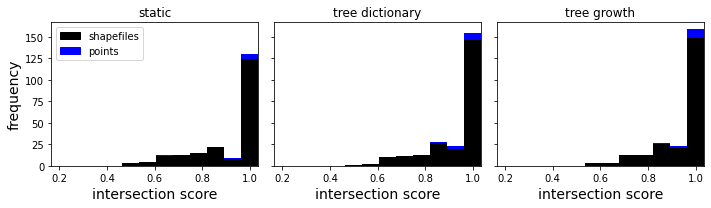

In [9]:
xlim = (0.2-1/30, 1+1/30)
area = 'wallen'
plotfunc(df_wallen_static_pol_2 , df_wallen_treedict_pol_2 , df_wallen_treegrowth_pol_2, wallen_static_points, wallen_treedict_points, wallen_treegrowth_points, xlim, area)

# IJburg

In [10]:
# retrieve static method shapefile results and merge on id
df_ijburg_static = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\ijburg_2020_static.csv")
df_ijburg_static_pol = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\ijburg_static_polygonen.csv")
id_ijburg_static_pol = []
for i, row in df_ijburg_static_pol.iterrows():
    number = row['uid'][3:9]
    id_ijburg_static_pol.append(int(number))
df_ijburg_static_pol_2 = df_ijburg_static[df_ijburg_static['number'].isin(id_ijburg_static_pol)]

# retrieve treedict method shapefile results and merge on id
df_ijburg_treedict = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\ijburg_2020_treedict.csv")
df_ijburg_treedict_pol = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\ijburg_treedict_polygonen.csv")
id_ijburg_treedict_pol = []
for i, row in df_ijburg_treedict_pol.iterrows():
    number = row['uid'][3:9]
    id_ijburg_treedict_pol.append(int(number))
df_ijburg_treedict_pol_2 = df_ijburg_treedict[df_ijburg_treedict['number'].isin(id_ijburg_treedict_pol)]

# retrieve treegrowth method shapefile results and merge on id
df_ijburg_treegrowth = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\ijburg_2020_treegrowth.csv")
df_ijburg_treegrowth_pol = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\ijburg_treegrowth_polygonen.csv")
id_ijburg_treegrowth_pol = []
for i, row in df_ijburg_treegrowth_pol.iterrows():
    number = row['uid'][3:9]
    id_ijburg_treegrowth_pol.append(int(number))
df_ijburg_treegrowth_pol_2 = df_ijburg_treegrowth[df_ijburg_treegrowth['number'].isin(id_ijburg_treegrowth_pol)]

In [11]:
# retrieve results from point intersection
ijburg_static_points = np.load(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\ijburg_static_punten.npy")
ijburg_treedict_points = np.load(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\ijburg_treedict_punten.npy")
ijburg_treegrowth_points = np.load(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\ijburg_treegrowth_punten.npy")


[-0.03333333  0.03777778  0.10888889  0.18        0.25111111  0.32222222
  0.39333333  0.46444444  0.53555556  0.60666667  0.67777778  0.74888889
  0.82        0.89111111  0.96222222  1.03333333]


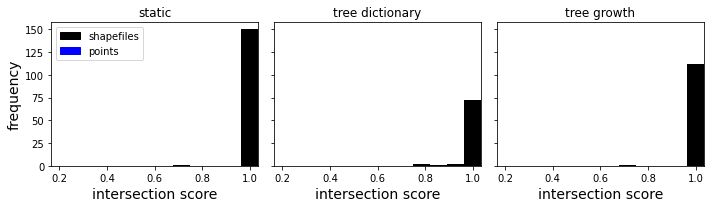

In [12]:
xlim = (0.2-1/30, 1+1/30)
area = 'ijburg'
plotfunc(df_ijburg_static_pol_2 , df_ijburg_treedict_pol_2 , df_ijburg_treegrowth_pol_2, ijburg_static_points, ijburg_treedict_points, ijburg_treegrowth_points, xlim, area)

# Sarphatipark


In [13]:
# retrieve static method shapefile results and merge on id
df_sarphati_static = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\sarphati_2020_static.csv")
df_sarphati_static_pol = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\sarphati_static_polygonen.csv")
id_sarphati_static_pol = []
for i, row in df_sarphati_static_pol.iterrows():
    number = row['uid'][3:9]
    id_sarphati_static_pol.append(int(number))
df_sarphati_static_pol_2 = df_sarphati_static[df_sarphati_static['number'].isin(id_sarphati_static_pol)]

# retrieve treedict method shapefile results and merge on id
df_sarphati_treedict = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\sarphati_2020_treedict.csv")
df_sarphati_treedict_pol = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\sarphati_treedict_polygonen.csv")
id_sarphati_treedict_pol = []
for i, row in df_sarphati_treedict_pol.iterrows():
    number = row['uid'][3:9]
    id_sarphati_treedict_pol.append(int(number))
df_sarphati_treedict_pol_2 = df_sarphati_treedict[df_sarphati_treedict['number'].isin(id_sarphati_treedict_pol)]

# retrieve treegrowth method shapefile results and merge on id
df_sarphati_treegrowth = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\sarphati_2020_treegrowth.csv")
df_sarphati_treegrowth_pol = pd.read_csv(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\sarphati_treegrowth_polygonen.csv")
id_sarphati_treegrowth_pol = []
for i, row in df_sarphati_treegrowth_pol.iterrows():
    number = row['uid'][3:9]
    id_sarphati_treegrowth_pol.append(int(number))
df_sarphati_treegrowth_pol_2 = df_sarphati_treegrowth[df_sarphati_treegrowth['number'].isin(id_sarphati_treegrowth_pol)]

In [14]:
# retrieve results from point intersection
sarphati_static_points = np.load(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\sarphati_static_punten.npy")
sarphati_treedict_points = np.load(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\sarphati_treedict_punten.npy")
sarphati_treegrowth_points = np.load(r"C:\Users\Iris Reitsma\Documents\Master\jaar 2\stage\validatie\sarphati_treegrowth_punten.npy")

[-0.03333333  0.03777778  0.10888889  0.18        0.25111111  0.32222222
  0.39333333  0.46444444  0.53555556  0.60666667  0.67777778  0.74888889
  0.82        0.89111111  0.96222222  1.03333333]


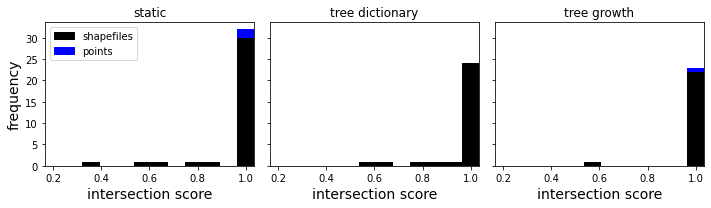

In [15]:
xlim = (0.2-1/30, 1+1/30)
area = 'sarphati'
plotfunc(df_sarphati_static_pol_2 , df_sarphati_treedict_pol_2 , df_sarphati_treegrowth_pol_2, sarphati_static_points, sarphati_treedict_points, sarphati_treegrowth_points, xlim, area)